In [1]:
import pandas as pd
import html

In [2]:
organes = pd.read_csv('out/organes.csv')

In [3]:
amendements = (
    pd
    .read_csv('out/amendements.csv')
    .query('organe.str.startswith("PO")')
    .join(
        organes.set_index('uid'),
        on='organe'
    )
)

amendements

,id,numero,texte,signataire,organe,dispositif,seance,sort,discussion_commune,discussion_identique,...,regime,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee
0,AMANR5L16PO791932B0324P0D1N000002,2,PIONANR5L16B0324,PA795730,PO800538,"<p style=""text-align: justify;"">Supprimer cet ...",NaN,NaN,NaN,NaN,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#61468F
1,AMANR5L16PO419610B0324P0D1N000014,CE14,PIONANR5L16B0324,PA795164,PO800490,"<p style=""text-align: justify;"">Le III de l'ar...",NaN,Rejeté,NaN,NaN,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313
2,AMANR5L16PO791932B0324P0D1N000009,9,PIONANR5L16B0324,PA794678,PO800520,"<p style=""text-align: justify;"">Dans un d&#233...",NaN,NaN,NaN,NaN,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E
3,AMANR5L16PO419610B0324P0D1N000018,CE18,PIONANR5L16B0324,PA795164,PO800490,"<p style=""text-align: justify;"">Apr&#232;s l&#...",NaN,Tombé,NaN,NaN,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313
4,AMANR5L16PO419610B0324P0D1N000007,CE7,PIONANR5L16B0324,PA794146,PO800526,"<p style=""text-align: justify;"">&#192; compter...",NaN,Rejeté,NaN,NaN,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,8.0,#77AA79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86661,AMANR5L16PO791932B0950P0D1N000018,18,PRJLANR5L16BTC0950,PA795438,PO800490,NaN,NaN,NaN,NaN,NaN,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313
86662,AMANR5L16PO791932B0950P0D1N000026,26,PRJLANR5L16BTC0950,PA795438,PO800490,NaN,NaN,NaN,NaN,NaN,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313
86663,AMANR5L16PO791932B0950P0D1N000007,7,PRJLANR5L16BTC0950,PA722142,PO800490,NaN,NaN,NaN,NaN,NaN,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313
86664,AMANR5L16PO791932B0950P0D1N000005,5,PRJLANR5L16BTC0950,PA720892,PO800490,NaN,NaN,NaN,NaN,NaN,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313


In [4]:
(
    amendements
    .dropna(subset="dispositif")
    .assign(
        dispositif_txt = lambda df: df.dispositif.str.replace(r'<[^<>]*>', '', regex=True).apply(html.unescape)
    )
    .pipe(lambda df: (
        df
        [df.duplicated(subset=['texte', 'dispositif_txt'], keep=False)]
    ))
)

,id,numero,texte,signataire,organe,dispositif,seance,sort,discussion_commune,discussion_identique,...,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee,dispositif_txt
0,AMANR5L16PO791932B0324P0D1N000002,2,PIONANR5L16B0324,PA795730,PO800538,"<p style=""text-align: justify;"">Supprimer cet ...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#61468F,Supprimer cet article.
6,AMANR5L16PO419610B0324P0D1N000008,CE8,PIONANR5L16B0324,PA794146,PO800526,"<p style=""text-align: justify;"">Apr&#232;s l&#...",NaN,Rejeté,NaN,"{'idDiscussion': '57350', 'typePosition': 'Der...",...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,8.0,#77AA79,"Après l’article L. 211‑2 du code de l’énergie,..."
8,AMANR5L16PO419610B0324P0D1N000012,CE12,PIONANR5L16B0324,PA795164,PO800490,"<p style=""text-align: justify;"">Apr&#232;s l&#...",NaN,Tombé,NaN,"{'idDiscussion': '57349', 'typePosition': 'Pre...",...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313,"Après l’alinéa 5, insérer l'alinéa suivant :« ..."
14,AMANR5L16PO419610B0324P0D1N000003,CE3,PIONANR5L16B0324,PA795730,PO800538,"<p style=""text-align: justify;"">Supprimer cet ...",NaN,Adopté,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#61468F,Supprimer cet article.
15,AMANR5L16PO791932B0324P0D1N000001,1,PIONANR5L16B0324,PA795730,PO800538,"<p style=""text-align: justify;"">Supprimer cet ...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#61468F,Supprimer cet article.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86630,AMANR5L16PO791932B0760P0D1N013340,13340,PRJLANR5L16B0760,PA793872,PO800490,"<p style=""text-align: justify;"">Il est cr&#233...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313,Il est créé une contribution exceptionnelle su...
86631,AMANR5L16PO420120B0760P0D1N002661,AS2661,PRJLANR5L16B0760,PA794938,PO800490,"<p style=""text-align: justify;"">Compl&#233;ter...",NaN,NaN,NaN,"{'idDiscussion': '58809', 'typePosition': 'Mil...",...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313,Compléter l’alinéa 3 par les mots :« et est aj...
86632,AMANR5L16PO791932B0760P0D1N001505,1505,PRJLANR5L16B0760,PA795982,PO800490,"<p style=""text-align: justify;"">Compl&#233;ter...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313,Compléter l’alinéa 7 par les mots :« sans que ...
86633,AMANR5L16PO791932B0760P0D1N015121,15121,PRJLANR5L16B0760,PA794066,PO800490,"<p style=""text-align: justify;"">I. &#8211; A. ...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313,I. – A. – Il est institué une contribution exc...


In [12]:
identiques = (
    amendements
    .dropna(subset="dispositif")
    .assign(
        dispositif_txt = lambda df: df.dispositif.str.replace(r'<[^<>]*>', '', regex=True).apply(html.unescape)
    )
    .pipe(lambda df: (
        df
        [df.duplicated(subset=['texte', 'dispositif_txt'], keep=False)]
    ))
    .assign(dummy=True)
    .pivot_table(
        index=['texte', 'dispositif_txt'],
        columns='libelleAbrev',
        values = 'dummy',
        #aggfunc='sum'
    )
    .fillna(0)
    .pipe(lambda df: df[ df.sum(axis=1) > 1 ])
)

identiques

libelleAbrev                                                           DEM  \
texte              dispositif_txt                                            
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...  0.0   
                   Supprimer cet article.                              0.0   
                   Supprimer les deux dernières phrases de l’aliné...  0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...  0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...  0.0   
...                                                                    ...   
PRJLANR5L16BTC1234 À l’alinéa 64, substituer au mot : « quinze »le...  0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...  0.0   
                   À la deuxième phrase de l’alinéa 71, après le m...  0.0   
                   À la fin de la première phrase, substituer à l’...  1.0   
                   À l’avant-dernière phrase de l’article 45, subs...  1.0   

libelleAbrev                                                           ECOLO  \
texte              dispositif_txt                                              
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...    1.0   
                   Supprimer cet article.                                1.0   
                   Supprimer les deux dernières phrases de l’aliné...    0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...    1.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...    1.0   
...                                                                      ...   
PRJLANR5L16BTC1234 À l’alinéa 64, substituer au mot : « quinze »le...    0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...    0.0   
                   À la deuxième phrase de l’alinéa 71, après le m...    0.0   
                   À la fin de la première phrase, substituer à l’...    0.0   
                   À l’avant-dernière phrase de l’article 45, subs...    0.0   

libelleAbrev                                                           GDR-NUPES  \
texte              dispositif_txt                                                  
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...        0.0   
                   Supprimer cet article.                                    0.0   
                   Supprimer les deux dernières phrases de l’aliné...        0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...        0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...        0.0   
...                                                                          ...   
PRJLANR5L16BTC1234 À l’alinéa 64, substituer au mot : « quinze »le...        0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...        0.0   
                   À la deuxième phrase de l’alinéa 71, après le m...        0.0   
                   À la fin de la première phrase, substituer à l’...        0.0   
                   À l’avant-dernière phrase de l’article 45, subs...        0.0   

libelleAbrev                                                           HOR  \
texte              dispositif_txt                                            
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...  0.0   
                   Supprimer cet article.                              0.0   
                   Supprimer les deux dernières phrases de l’aliné...  0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...  0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...  0.0   
...                                                                    ...   
PRJLANR5L16BTC1234 À l’alinéa 64, substituer au mot : « quinze »le...  0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...  0.0   
                   À la deuxième phrase de l’alinéa 71, après le m...  

In [13]:
identiques.to_csv('out/amendements_identiques.csv')

In [14]:
(
    amendements
    .dropna(subset="dispositif")
    .assign(
        dispositif_txt = lambda df: df.dispositif.str.replace(r'<[^<>]*>', '', regex=True).apply(html.unescape)
    )
    .pipe(lambda df: (
        df
        [df.duplicated(subset=['texte', 'dispositif_txt'], keep=False)]
    ))
    .assign(dummy=True)
    .pivot_table(
        index=['texte', 'dispositif_txt'],
        columns='libelle',
        values = 'id',
        aggfunc= lambda x:list(x)
    )
    .fillna(0)
)

libelle                                                                    Démocrate (MoDem et Indépendants)  \
texte              dispositif_txt                                                                              
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...                                      0   
                   Supprimer cet article.                                                                  0   
                   Supprimer les deux dernières phrases de l’aliné...                                      0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                      0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                      0   
...                                                                                                      ...   
PRJLANR5L16BTC1234 À la dernière phrase, après le mot :« moment »i...                                      0   
                   À la deuxième phrase de l’alinéa 71, après le m...                                      0   
                   À la fin de la première phrase, substituer à l’...  [AMANR5L16PO791932BTC1234P0D1N000022]   
                   À la seizième ligne de la cinquième colonne du ...                                      0   
                   À l’avant-dernière phrase de l’article 45, subs...  [AMANR5L16PO791932BTC1234P0D1N001715]   

libelle                                                               Gauche démocrate et républicaine - NUPES  \
texte              dispositif_txt                                                                                
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...                                        0   
                   Supprimer cet article.                                                                    0   
                   Supprimer les deux dernières phrases de l’aliné...                                        0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                        0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                        0   
...                                                                                                        ...   
PRJLANR5L16BTC1234 À la dernière phrase, après le mot :« moment »i...                                        0   
                   À la deuxième phrase de l’alinéa 71, après le m...                                        0   
                   À la fin de la première phrase, substituer à l’...                                        0   
                   À la seizième ligne de la cinquième colonne du ...                                        0   
                   À l’avant-dernière phrase de l’article 45, subs...                                        0   

libelle                                                                               Horizons et apparentés  \
texte              dispositif_txt                                                                              
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...                                      0   
                   Supprimer cet article.                                                                  0   
                   Supprimer les deux dernières phrases de l’aliné...                                      0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                      0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                      0   
...                                                                                                      ...   
PRJLANR5L16BTC1234 À la dernière phrase, après le mot :« moment »i...                                      0   
                   À la deuxième phrase de l’alinéa 

In [15]:
(
    amendements
    .query('libelle == "Rassemblement National"')
    .dropna(subset="dispositif")
    .assign(
        dispositif_txt = lambda df: df.dispositif.str.replace(r'<[^<>]*>', '', regex=True).apply(html.unescape)
    )
    .pipe(lambda df: (
        df
        [~df.duplicated(subset=['texte', 'dispositif_txt'], keep=False)]
    ))
)

,id,numero,texte,signataire,organe,dispositif,seance,sort,discussion_commune,discussion_identique,...,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee,dispositif_txt
2,AMANR5L16PO791932B0324P0D1N000009,9,PIONANR5L16B0324,PA794678,PO800520,"<p style=""text-align: justify;"">Dans un d&#233...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E,Dans un délai de six mois à compter de la prom...
10,AMANR5L16PO791932B0324P0D1N000006,6,PIONANR5L16B0324,PA794442,PO800520,"<p style=""text-align: justify;"">R&#233;diger a...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E,Rédiger ainsi cet article : « I. – La perte de...
16,AMANR5L16PO791932B0324P0D1N000003,3,PIONANR5L16B0324,PA794442,PO800520,"<p style=""text-align: justify;"">Apr&#232;s le ...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E,"Après le cinquième alinéa, insérer l'alinéa su..."
22,AMANR5L16PO791932B0324P0D1N000007,7,PIONANR5L16B0324,PA720468,PO800520,"<p style=""text-align: justify;"">Le Gouvernemen...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E,Le Gouvernement prend toutes les mesures d’inf...
27,AMANR5L16PO791932B0324P0D1N000008,8,PIONANR5L16B0324,PA794678,PO800520,"<p style=""text-align: justify;"">Dans un d&#233...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E,Dans un délai de douze mois à compter de la pr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84563,AMANR5L16PO791932B0760P0D1N019571,19571,PRJLANR5L16B0760,PA795540,PO800520,"<p style=""text-align: justify;"">Compl&#233;ter...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E,Compléter cet article par l’alinéa suivant :« ...
85524,AMANR5L16PO791932B0760P0D1N015227,15227,PRJLANR5L16B0760,PA796026,PO800520,"<p style=""text-align: justify;"">Supprimer les ...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E,Supprimer les deuxième et avant-dernière phras...
85619,AMANR5L16PO791932B0760P0D1N018825,18825,PRJLANR5L16B0760,PA794678,PO800520,"<p style=""text-align: justify;"">Le I de l&#821...",NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E,Le I de l’article L. 161‑17 du code de la sécu...
85715,AMANR5L16PO791932B0760P0D1N016663,16663,PRJLANR5L16B0760,PA795778,PO800520,"<p style=""text-align: justify;"">I. &#8211; Il ...",RUANR5L16S2023IDS26802,Rejeté,NaN,NaN,...,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#35495E,I. – Il est institué en 2023 une contribution ...


In [17]:
(
    identiques
    [identiques['RN'] == True]
    .sum()
)

libelleAbrev
DEM           59.0
ECOLO         81.0
GDR-NUPES     74.0
HOR           38.0
LFI-NUPES     94.0
LIOT         116.0
LR           305.0
NI            95.0
RE           131.0
RN           497.0
SOC          108.0
dtype: float64

In [18]:
(
    identiques
    [identiques['RN'] == True]
)

libelleAbrev                                                           DEM  \
texte              dispositif_txt                                            
PIONANR5L16B0257   Supprimer cet article.                              1.0   
PIONANR5L16B0322   Supprimer cet article.                              1.0   
PIONANR5L16B0323   Supprimer cet article.                              0.0   
PIONANR5L16B0325   Supprimer cet article.                              0.0   
                   À la première phrase de l’alinéa 9, supprimer l...  0.0   
...                                                                    ...   
PRJLANR5L16BTC1234 À l’alinéa 2, après le mot :« service », insére...  0.0   
                   À l’alinéa 3, substituer au mot : « dix »le mot...  1.0   
                   À l’alinéa 64, substituer au mot : « quinze »le...  0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...  0.0   
                   À la fin de la première phrase, substituer à l’...  1.0   

libelleAbrev                                                           ECOLO  \
texte              dispositif_txt                                              
PIONANR5L16B0257   Supprimer cet article.                                1.0   
PIONANR5L16B0322   Supprimer cet article.                                0.0   
PIONANR5L16B0323   Supprimer cet article.                                0.0   
PIONANR5L16B0325   Supprimer cet article.                                0.0   
                   À la première phrase de l’alinéa 9, supprimer l...    0.0   
...                                                                      ...   
PRJLANR5L16BTC1234 À l’alinéa 2, après le mot :« service », insére...    0.0   
                   À l’alinéa 3, substituer au mot : « dix »le mot...    0.0   
                   À l’alinéa 64, substituer au mot : « quinze »le...    0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...    0.0   
                   À la fin de la première phrase, substituer à l’...    0.0   

libelleAbrev                                                           GDR-NUPES  \
texte              dispositif_txt                                                  
PIONANR5L16B0257   Supprimer cet article.                                    0.0   
PIONANR5L16B0322   Supprimer cet article.                                    0.0   
PIONANR5L16B0323   Supprimer cet article.                                    0.0   
PIONANR5L16B0325   Supprimer cet article.                                    0.0   
                   À la première phrase de l’alinéa 9, supprimer l...        0.0   
...                                                                          ...   
PRJLANR5L16BTC1234 À l’alinéa 2, après le mot :« service », insére...        0.0   
                   À l’alinéa 3, substituer au mot : « dix »le mot...        0.0   
                   À l’alinéa 64, substituer au mot : « quinze »le...        0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...        0.0   
                   À la fin de la première phrase, substituer à l’...        0.0   

libelleAbrev                                                           HOR  \
texte              dispositif_txt                                            
PIONANR5L16B0257   Supprimer cet article.                              1.0   
PIONANR5L16B0322   Supprimer cet article.                              1.0   
PIONANR5L16B0323   Supprimer cet article.                              0.0   
PIONANR5L16B0325   Supprimer cet article.                              0.0   
                   À la première phrase de l’alinéa 9, supprimer l...  0.0   
...                                                                    ...   
PRJLANR5L16BTC1234 À l’alinéa 2, après le mot :« service », insére...  0.0   
                   À l’alinéa 3, substituer au mot : « dix »le mot...  0.0   
                   À l’alinéa 64, substituer au mot : « quinze »le...  

In [19]:
(
    identiques.T
    .dot(identiques)
)

libelleAbrev,DEM,ECOLO,GDR-NUPES,HOR,LFI-NUPES,LIOT,LR,NI,RE,RN,SOC
libelleAbrev,,,,,,,,,,,
DEM,513.0,57.0,37.0,141.0,40.0,106.0,220.0,73.0,306.0,59.0,103.0
ECOLO,57.0,1064.0,195.0,37.0,360.0,141.0,156.0,47.0,161.0,81.0,645.0
GDR-NUPES,37.0,195.0,556.0,27.0,250.0,110.0,140.0,54.0,78.0,74.0,244.0
HOR,141.0,37.0,27.0,368.0,27.0,92.0,197.0,33.0,222.0,38.0,85.0
LFI-NUPES,40.0,360.0,250.0,27.0,758.0,82.0,95.0,49.0,94.0,94.0,348.0
LIOT,106.0,141.0,110.0,92.0,82.0,616.0,357.0,66.0,232.0,116.0,172.0
LR,220.0,156.0,140.0,197.0,95.0,357.0,1268.0,203.0,491.0,305.0,270.0
NI,73.0,47.0,54.0,33.0,49.0,66.0,203.0,332.0,79.0,95.0,59.0
RE,306.0,161.0,78.0,222.0,94.0,232.0,491.0,79.0,1005.0,131.0,230.0


In [12]:
(
    identiques
    .T
    .dot(identiques)
    .to_csv('out/amendements-identiques-groupes.csv')
)

In [13]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [14]:
identiques.T

texte                                                                                                                                                                                                                                                                                                               PIONANR5L16B0134  \
dispositif_txt                                     L’article L. 425‑5 du code de l’environnement est ainsi modifié :1° Le premier alinéa est ainsi rédigé́ :« L’agrainage et l’affouragement sont interdits en tout temps sur l’ensemble des territoires soumis à la chasse. » ;2° La seconde phrase du second alinéa est supprimée.   
libelle                                                                                                                                                                                                                                                                                                                                
Démocrate (MoDem et Indépendants)                                                                 0.0                                                                                                                                                                                                                                  
Gauche démocrate et républicaine - NUPES                                                          0.0                                                                                                                                                                                                                                  
Horizons et apparentés                                                                            0.0                                                                                                                                                                                                                                  
La France insoumise - Nouvelle Union Populaire ...                                                1.0                                                                                                                                                                                                                                  
Les Républicains                                                                                  0.0                                                                                                                                                                                                                                  
Libertés, Indépendants, Outre-mer et Territoires                                                  0.0                                                                                                                                                                                                                                  
Non inscrit                                                                                       0.0                                                                                                                                                                                                                                  
Rassemblement National                                                                            0.0                                                                                                                                                                                                                                  
Renaissance                                                                                       0.0                                                                                                                                                                                                                                  
Socialistes et apparentés (membre de l’intergro...              

In [15]:
pca = PCA(n_components=2)
X_r = pca.fit(identiques.T.values).transform(identiques.T.values)

In [16]:
X_r

array([[ -6.8528094 ,  -4.14247404],
       [  4.42611368, -10.21105275],
       [ -5.96833627,  -3.66814708],
       [ 10.72450024, -11.40712847],
       [-15.80707879,  13.73718961],
       [ -5.70192784,   0.25241673],
       [ -4.65608809,  -6.83806848],
       [ -5.06196694,  -5.1733444 ],
       [-10.56631381,   8.72500929],
       [ 19.80106457,  13.03362891],
       [ 19.66284265,   5.69197067]])

In [19]:
organes

,@xmlns,@xmlns:xsi,@xsi:type,uid,codeType,libelle,libelleEdition,libelleAbrege,libelleAbrev,viMoDe,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
0,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaireInternational,PO808166,GA,France-Timor Est,de France-Timor Est,Timor Est,TIM,"{'dateDebut': None, 'dateAgrement': '2022-06-2...",...,5ème République,16.0,"{'secretaire01': 'M. Simon Issard', 'secretair...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeExterne_Type,PO791595,MINISTERE,Ministère de l’Europe et des affaires étrangères,de l’Europe et des affaires étrangères,Europe et affaires étrangères,EAE,"{'dateDebut': '2022-05-21', 'dateAgrement': No...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeExtraParlementaire_type,PO223397,ORGEXTPARL,Conseil d'orientation pour la prévention des r...,du Conseil d'orientation pour la prévention de...,Risques naturels,172,"{'dateDebut': '2001-02-05', 'dateAgrement': No...",...,5ème République,NaN,NaN,NaN,Article L. 565-3 du code de l'environnement,https://afpcn.org/animation-et-reseau-dacteurs...,7.0,NaN,NaN,NaN
3,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaire_Type,PO273589,OFFPAR,Office parlementaire d'évaluation des choix sc...,de l'office parlementaire d'évaluation des cho...,office parlementaire d'évaluation des choix sc...,OTS,"{'dateDebut': '2002-06-19', 'dateAgrement': No...",...,5ème République,NaN,"{'secretaire01': 'M. Michel Bermond', 'secreta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaireInternational,PO807856,GA,France-Andorre,de France-Andorre,Andorre,AND,"{'dateDebut': None, 'dateAgrement': '2022-06-2...",...,5ème République,16.0,"{'secretaire01': 'M. Julien Souplet', 'secreta...",{'paysRef': 'GOP756420'},NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaire_Type,PO807341,GE,Attractivité économique et export,ATTRACTIVITÉ ÉCONOMIQUE ET EXPORT,ATTRACTIVITÉ ÉCONOMIQUE ET EXPORT,ATTRACTIVI,"{'dateDebut': None, 'dateAgrement': '2022-12-0...",...,5ème République,16.0,"{'secretaire01': 'Mme Graziella Raffy', 'secre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800484,GP,Démocrate (MoDem et Indépendants),du groupe Démocrate (MoDem et Indépendants),Dem,DEM,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215
631,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaire_Type,PO810484,MISINFO,Mission d'information sur la rationalisation d...,NaN,Rationalisation administration,RATADMIN,"{'dateDebut': '2022-12-08', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeExtraParlementaire_type,PO60210,ORGEXTPARL,Commission des comptes de la sécurité sociale,de la Commission des comptes de la sécurité so...,"Sécurité sociale, comptes",67,"{'dateDebut': '1979-03-22', 'dateAgrement': No...",...,5ème République,NaN,NaN,NaN,Article L. 114-1 du code de la sécurité sociale,http://www.securite-sociale.fr/Membres-de-la-C...,2.0,NaN,NaN,NaN


In [26]:
amendements_groupes_pca = (
    pd
    .DataFrame(
        X_r,
        columns=["composante 1", "composante 2"],
        index=identiques.T.index
    )
    .join(organes.query('codeType == "GP"').set_index('libelle'))
)

amendements_groupes_pca#.shape

,composante 1,composante 2,@xmlns,@xmlns:xsi,@xsi:type,uid,codeType,libelleEdition,libelleAbrege,libelleAbrev,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
libelle,,,,,,,,,,,,,,,,,,,,,
Démocrate (MoDem et Indépendants),-6.852809,-4.142474,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800484,GP,du groupe Démocrate (MoDem et Indépendants),Dem,DEM,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215
Gauche démocrate et républicaine - NUPES,4.426114,-10.211053,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800502,GP,du groupe de la Gauche démocrate et républicai...,GDR - NUPES,GDR-NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,9.0,#991414
Horizons et apparentés,-5.968336,-3.668147,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800514,GP,du groupe Horizons et apparentés,HOR,HOR,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,7.0,#32B3CA
La France insoumise - Nouvelle Union Populaire écologique et sociale,10.724500,-11.407128,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800490,GP,du groupe La France insoumise - Nouvelle Union...,LFI - NUPES,LFI-NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,3.0,#E42313
Les Républicains,-15.807079,13.737190,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800508,GP,du groupe Les Républicains,LR,LR,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,4.0,#4565AD
"Libertés, Indépendants, Outre-mer et Territoires",-5.701928,0.252417,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800532,GP,"du groupe Libertés, Indépendants, Outre-mer et...",LIOT,LIOT,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,10.0,#F8D434
Non inscrit,-4.656088,-6.838068,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO793087,GP,des députés non inscrits,NI,NI,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,99.0,#8D949A
Rassemblement National,-5.061967,-5.173344,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800520,GP,du groupe Rassemblement National,RN,RN,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E
Renaissance,-10.566314,8.725009,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800538,GP,du groupe Renaissance,RE,RE,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Majoritaire,1.0,#61468F


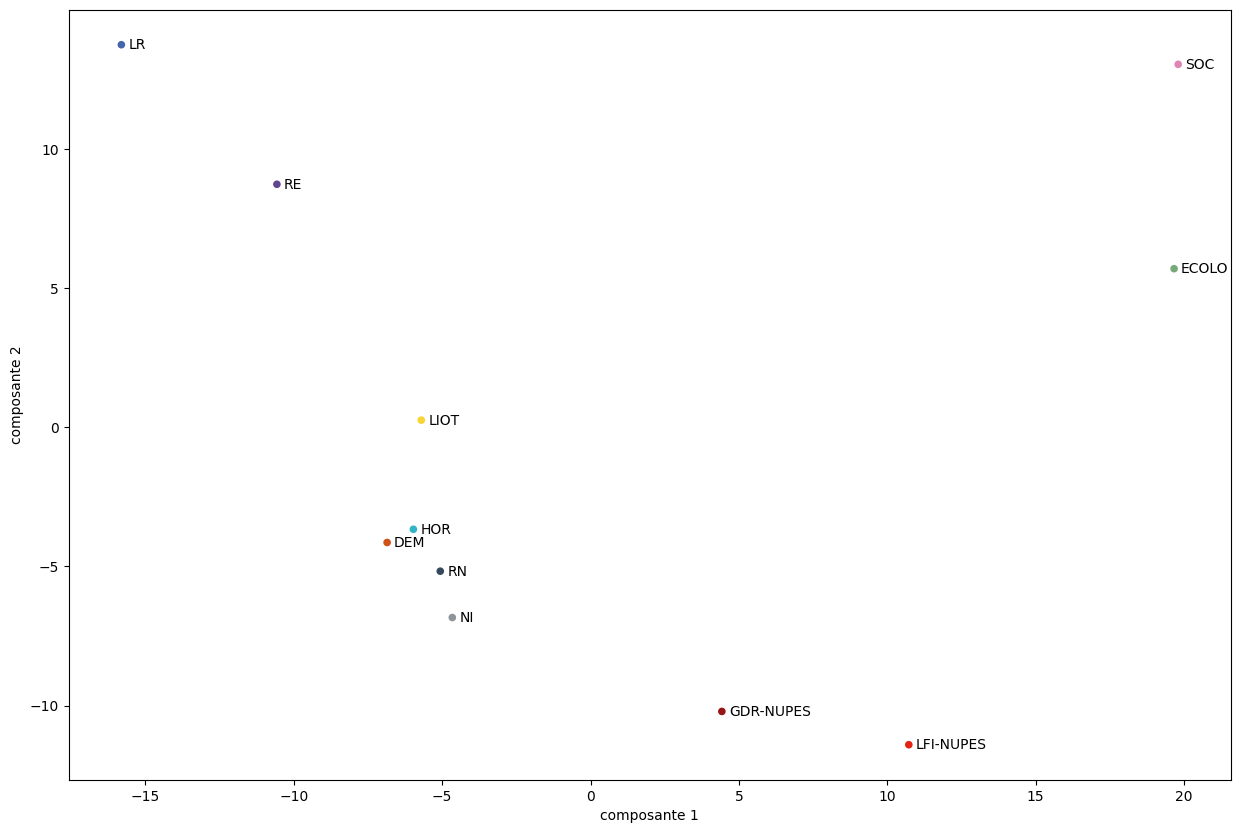

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

(
    amendements_groupes_pca
    .plot
    .scatter(
        x="composante 1",
        y="composante 2",
        c="couleurAssociee",
        ax=ax,
    )
)

for i,g in amendements_groupes_pca.iterrows():
    ax.annotate(g['libelleAbrev'], xy=(g['composante 1'], g['composante 2']), textcoords="offset points", xytext=(5, -3))